In [77]:
import pandas as pd
import numpy as np
df = pd.read_csv('model_data.csv').drop(columns = ['Unnamed: 0'])

# KNN 1, n = 5 -> n = 23 by elbow method

In [78]:
df.head()

,prev_CW/SA_rate,S_create2SA_Create,S_Create2Start_Time,SA_Create2Start_Time,U_create2now,U_approve2now,type_d,segmentName_d,net_pay,distance,target
0,0.0,0.024444,217.047500,217.023056,31.27281,24.076044,2,0,11.0,NaN,0
1,0.0,0.034444,19.714444,19.680000,31.27281,24.076044,2,0,45.0,NaN,0
2,0.0,0.011111,0.019167,0.008056,31.27281,24.076044,2,0,45.0,NaN,0
3,0.0,0.031667,183.788611,183.756944,31.27281,24.076044,2,1,40.0,NaN,0
4,0.0,6.073056,18.681111,12.608056,31.27281,24.076044,2,0,45.0,NaN,0


In [79]:
df.isna().sum()

prev_CW/SA_rate              0
S_create2SA_Create           0
S_Create2Start_Time          0
SA_Create2Start_Time         0
U_create2now                 0
U_approve2now               36
type_d                       0
segmentName_d                0
net_pay                      0
distance                109482
target                       0
dtype: int64

In [80]:
df.dropna(inplace = True) # If True, do operation inplace and return None.

In [81]:
# make a dataset that num of tar = num of non tar
import random
df_tar = df[df['target']==1]
df_nontar = df[df['target']==0]

number_of_tar = df_tar.shape[0]
random_indices = random.sample(range(len(df_nontar)), int(number_of_tar))
df_nontar = df_nontar[df_nontar.index.isin(random_indices)]

In [82]:
df = pd.concat([df_tar, df_nontar])

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('target',axis=1))
scaled_features = scaler.transform(df.drop('target',axis=1))

X = pd.DataFrame(scaled_features,columns=df.columns[:-1])
y = df['target']

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30)

In [85]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model instance with n_neighbors = 
knn = KNeighborsClassifier(n_neighbors = 5)

# Fit this KNN model to the training data.
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [86]:
# Use the predict method to predict values KNN model and X_test.
pred = knn.predict(X_test)

# Create a confusion matrix and classification report
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[ 47  38]
 [ 21 523]]


              precision    recall  f1-score   support

           0       0.69      0.55      0.61        85
           1       0.93      0.96      0.95       544

    accuracy                           0.91       629
   macro avg       0.81      0.76      0.78       629
weighted avg       0.90      0.91      0.90       629



Text(0, 0.5, 'Error Rate')

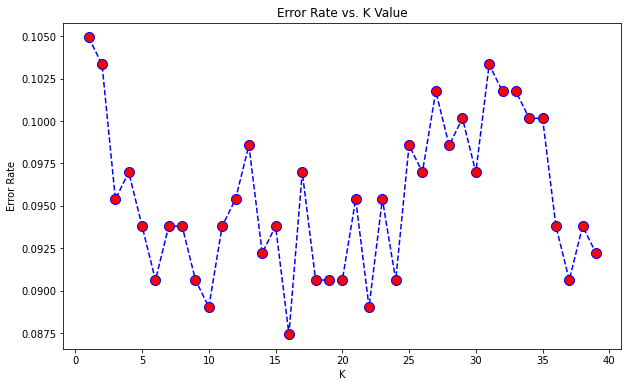

In [87]:
import matplotlib.pyplot as plt

# choose K, elbow method
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [88]:
# NOW WITH K = 16
knn = KNeighborsClassifier(n_neighbors=16)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[ 45  40]
 [ 15 529]]


              precision    recall  f1-score   support

           0       0.75      0.53      0.62        85
           1       0.93      0.97      0.95       544

    accuracy                           0.91       629
   macro avg       0.84      0.75      0.79       629
weighted avg       0.91      0.91      0.91       629



# KNN 2, pick significant value from LR

In [89]:
X = df[['prev_CW/SA_rate', 'type_d', 'segmentName_d', 'net_pay', 'prev_CW/SA_rate']]
Y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [90]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model instance with n_neighbors = 
knn = KNeighborsClassifier(n_neighbors = 5)

# Fit this KNN model to the training data.
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [91]:
# Use the predict method to predict values KNN model and X_test.
pred = knn.predict(X_test)

# Create a confusion matrix and classification report
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[ 33  46]
 [ 36 514]]


              precision    recall  f1-score   support

           0       0.48      0.42      0.45        79
           1       0.92      0.93      0.93       550

    accuracy                           0.87       629
   macro avg       0.70      0.68      0.69       629
weighted avg       0.86      0.87      0.87       629



Text(0, 0.5, 'Error Rate')

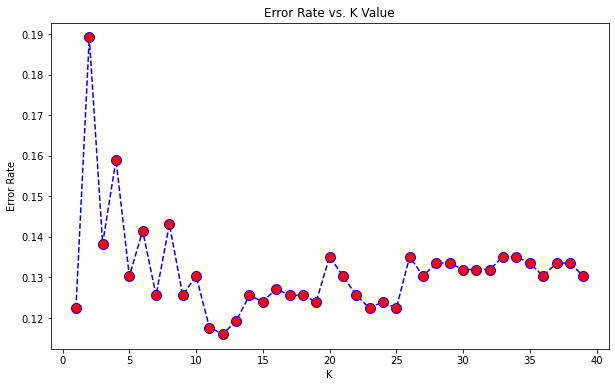

In [92]:
# choose K, elbow method
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [93]:
# NOW WITH K = 12
knn = KNeighborsClassifier(n_neighbors=12)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[ 31  48]
 [ 25 525]]


              precision    recall  f1-score   support

           0       0.55      0.39      0.46        79
           1       0.92      0.95      0.93       550

    accuracy                           0.88       629
   macro avg       0.73      0.67      0.70       629
weighted avg       0.87      0.88      0.88       629

